#Salary Prediction of Employees using Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.impute import SimpleImputer

In [2]:
#load dataset
df=pd.read_csv('Salary Data.csv')
#print(df.to_string())
print("First 5 rows:",df.head())

First 5 rows:     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [3]:
#basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


From the basic info we see that, there are total 375 entries and some of those data are missing.

We can see if missing data exists or not through isnull() method

In [4]:
print(df.isnull().sum())

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


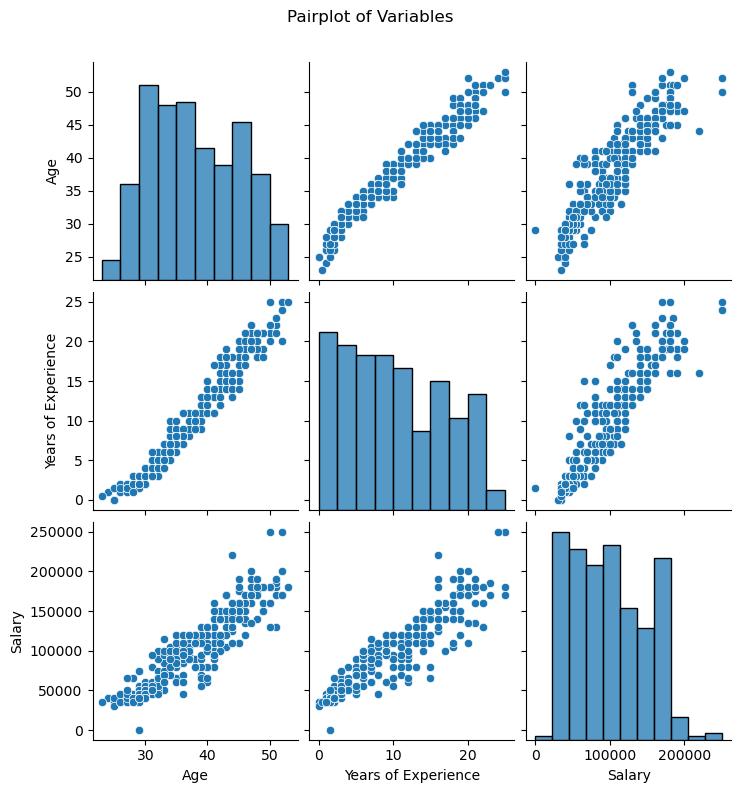

In [5]:
sns.pairplot(df)
plt.suptitle('Pairplot of Variables',y=1.05)
plt.show()

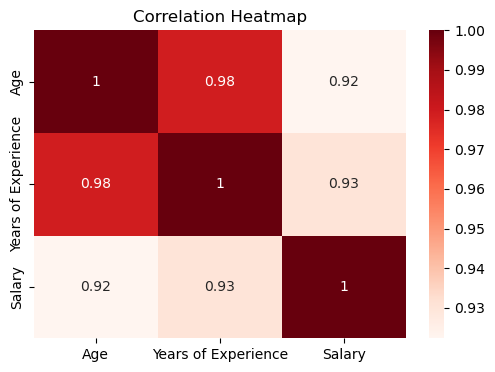

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
#Encode categorical variables
df_encoded= pd.get_dummies(df,columns=['Gender','Education Level','Job Title'],drop_first=True)
print("Encoded Columns: ",df_encoded.columns)

Encoded Columns:  Index(['Age', 'Years of Experience', 'Salary', 'Gender_Male',
       'Education Level_Master's', 'Education Level_PhD',
       'Job Title_Accountant', 'Job Title_Administrative Assistant',
       'Job Title_Business Analyst', 'Job Title_Business Development Manager',
       ...
       'Job Title_Supply Chain Manager', 'Job Title_Technical Recruiter',
       'Job Title_Technical Support Specialist', 'Job Title_Technical Writer',
       'Job Title_Training Specialist', 'Job Title_UX Designer',
       'Job Title_UX Researcher', 'Job Title_VP of Finance',
       'Job Title_VP of Operations', 'Job Title_Web Developer'],
      dtype='object', length=179)


In [20]:
#Handle Missing Values
df_encoded.dropna(inplace=True)

In [21]:
#Feature and Target Selection
X=df_encoded.drop('Salary',axis=1)
y=df_encoded['Salary']

In [22]:
#Impute Missing Values in X (if any)
imputer= SimpleImputer(strategy='mean')
X=pd.DataFrame(imputer.fit_transform(X),columns=X.columns)

In [23]:
#Train_Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
#Train Linear Regression Model
model=LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
#Model Coefficients
print("\n Model Coefficients:")
coeff_df=pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)


 Model Coefficients:
                             Coefficient
Age                         2.477170e+03
Years of Experience         1.143458e+03
Gender_Male                 8.315781e+02
Education Level_Master's    5.293300e+03
Education Level_PhD         1.305268e+04
...                                  ...
Job Title_UX Designer      -6.205064e+03
Job Title_UX Researcher     3.183231e-11
Job Title_VP of Finance     6.475174e+04
Job Title_VP of Operations  5.475174e+04
Job Title_Web Developer    -1.540963e+04

[178 rows x 1 columns]


In [26]:
#Predict on Test_data
y_pred=model.predict(X_test)

In [27]:
#Model Evaluation

print("\n Model Performance: ")
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R-squared: ",r2_score(y_test,y_pred))



 Model Performance: 
MAE: 11596.521058222495
MSE: 354248539.0076618
RMSE: 18821.491412947642
R-squared:  0.8522475952130963


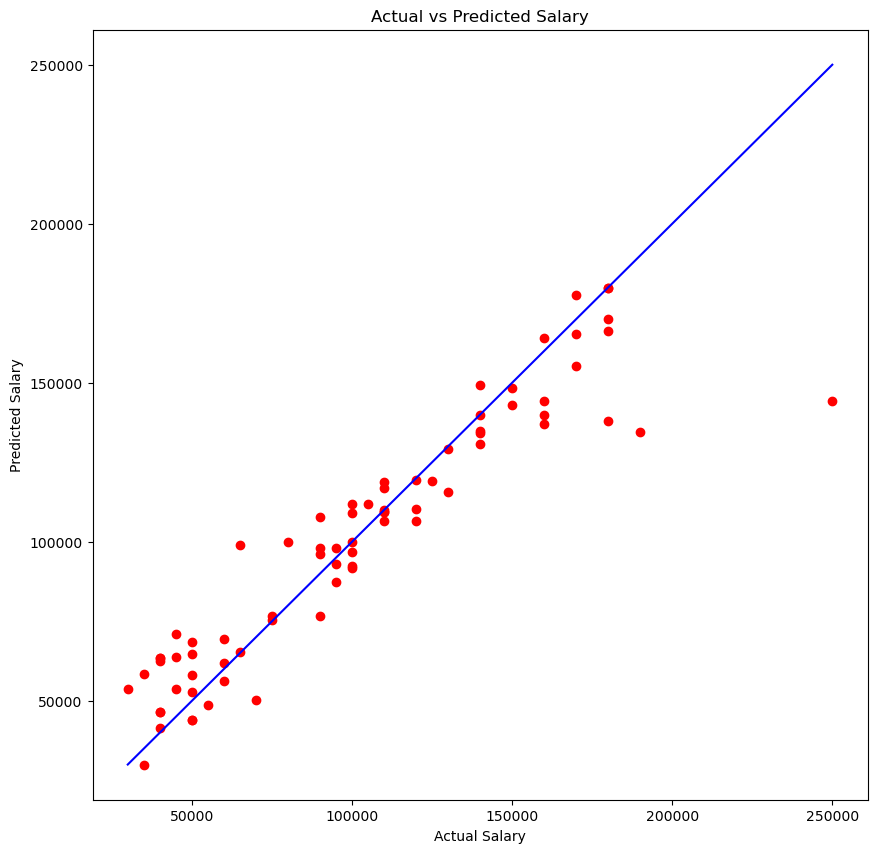

In [28]:
#Visualization- Actual vs Predicted

plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred,color='red')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'b')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()


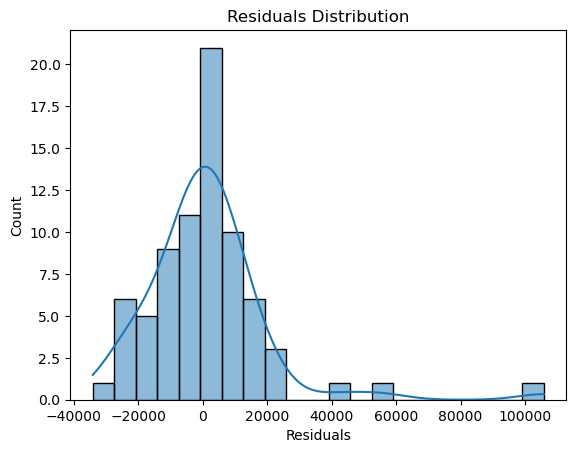

In [ ]:
#Residual Analysis
residuals= y_test-y_pred
sns.histplot(residuals,kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

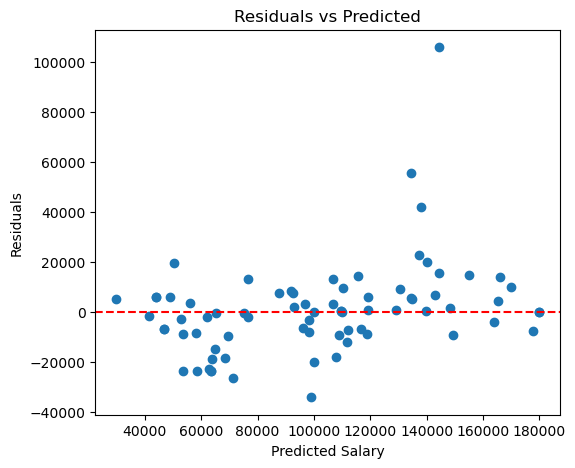

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(y_pred,residuals)
plt.axhline(y=0,color='red',linestyle="--")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

In [ ]:
#Predict Salary from new input
def predict_salary(age,gender,education_level,job_title,years_of_experience):
    input_data=pd.DataFrame({
        'Age':[age],
        'Years of Experience': [years_of_experience],
        'Gender_' + gender:[1],
        'Education Level_'+education_level:[1],
        'Job Title_' +job_title:[1]
    })

    for col in X.columns:
        if col not in input_data.columns:
            input_data[col]=0
    
    input_data=input_data[X.columns]
    predicted_salary=model.predict(input_data)[0]
    print(f"Predicted Salary for input: NPR {predicted_salary:.2f}")
    return predicted_salary


In [ ]:
#predict_salary(age=30,gender='Female',education_level='Bachelors',job_title='Data Scientist',years_of_experience=5)
